
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
classes=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## The Data

**Download the fashion mnist dataset using Keras.**

In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt  

In [3]:
from matplotlib.image import imread

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [5]:
x_train[5].shape

(28, 28)

In [6]:
x_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

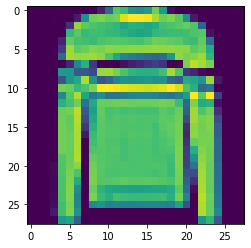

In [7]:
plt.imshow(x_train[5])

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

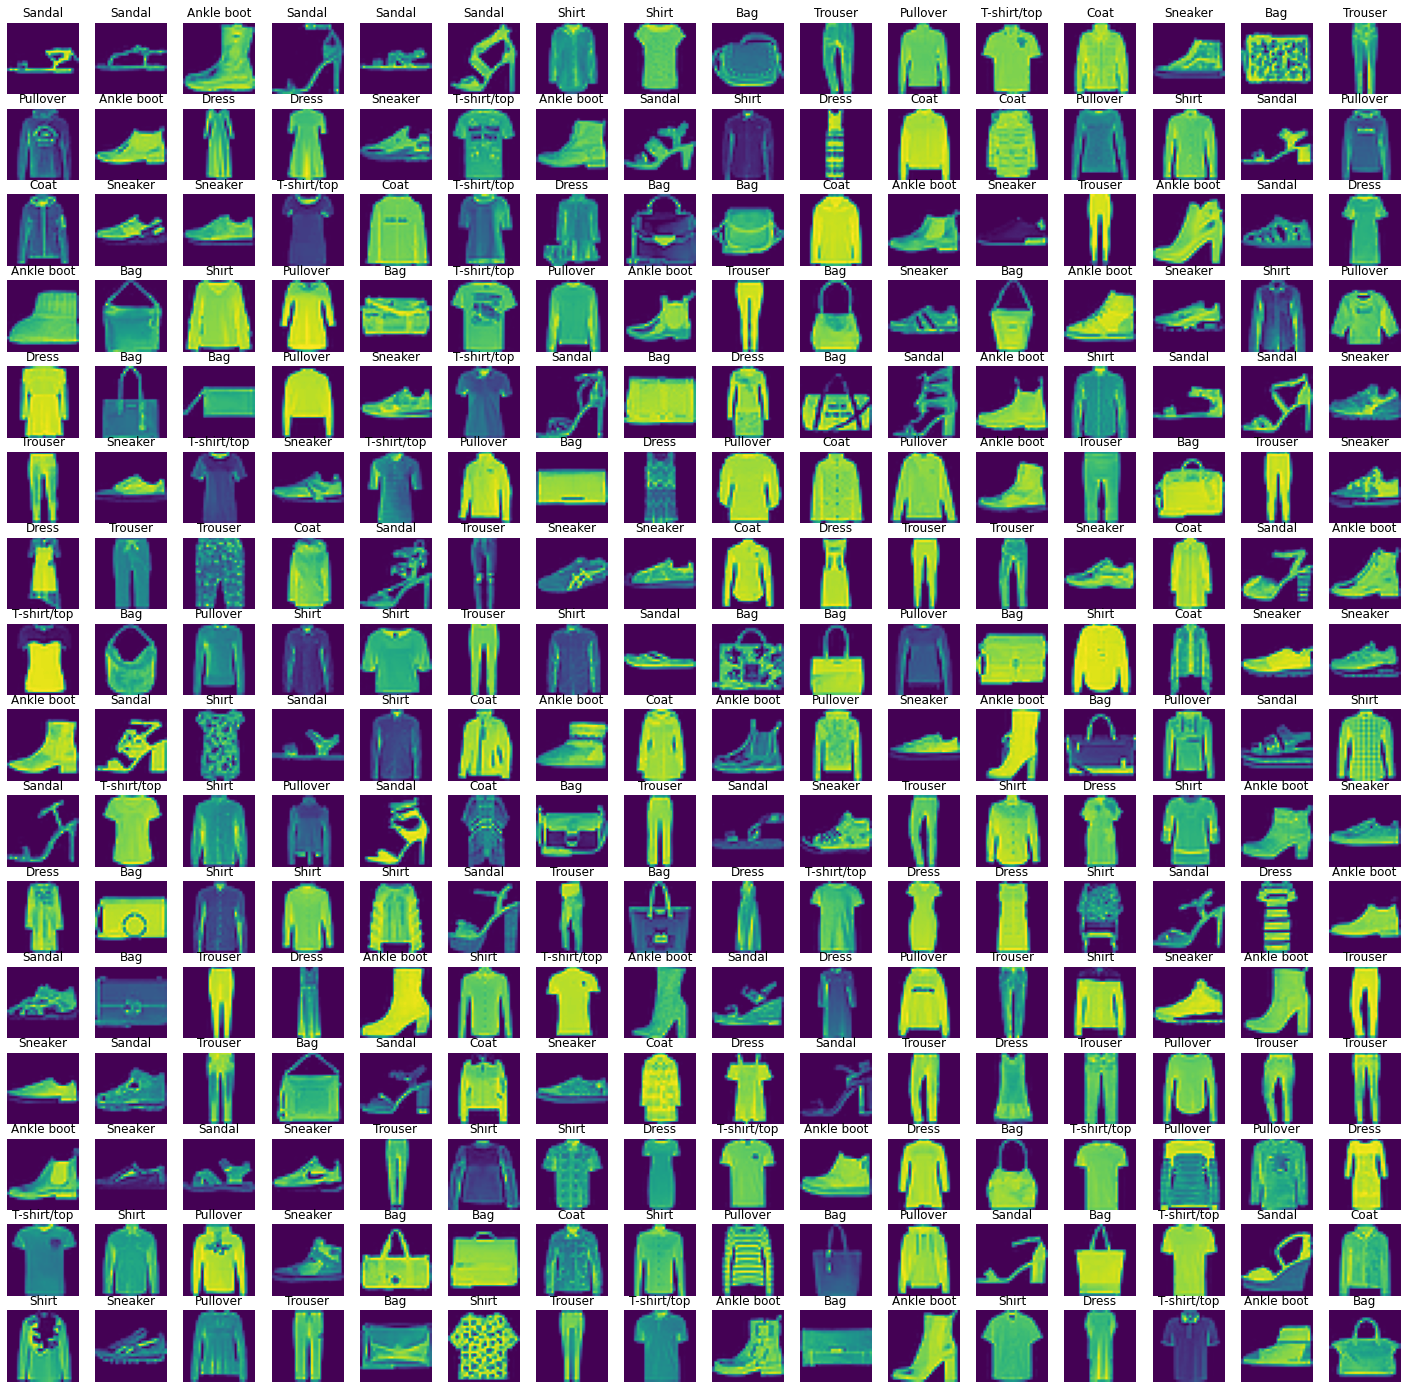

In [11]:
plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(16, 16, i+1, label=classes[int(y_train[rand_index])])
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])  

In [12]:
x_train[5].min()

0

In [13]:
x_train[5].max()

255

In [14]:
# Normalize image pixels
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [15]:
x_train[5].min()

0.0

In [16]:
x_train[5].max()


1.0

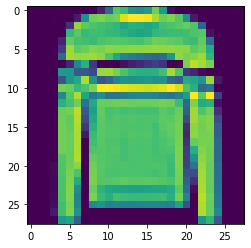

In [17]:
plt.imshow(x_train[5])

In [18]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)
y_test.shape

(10000, 10)

**Reshape the X into 4 dimension**

In [22]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [23]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [24]:
y_train[0].reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [25]:
y_train[0].reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [27]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [31]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 43s 22ms/step - loss: 0.3877 - accuracy: 0.8625 - val_loss: 0.3107 - val_accuracy: 0.8895
Epoch 2/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.2646 - accuracy: 0.9057 - val_loss: 0.2736 - val_accuracy: 0.9039
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2272 - accuracy: 0.9190 - val_loss: 0.2842 - val_accuracy: 0.9030
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2025 - accuracy: 0.9276 - val_loss: 0.2801 - val_accuracy: 0.9045


**Plot values of metrics you used in your model.**

In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.387659,0.862533,0.310744,0.8895
1,0.264593,0.905683,0.273616,0.9039
2,0.227217,0.919033,0.284236,0.9030
3,0.202486,0.927650,0.280129,0.9045


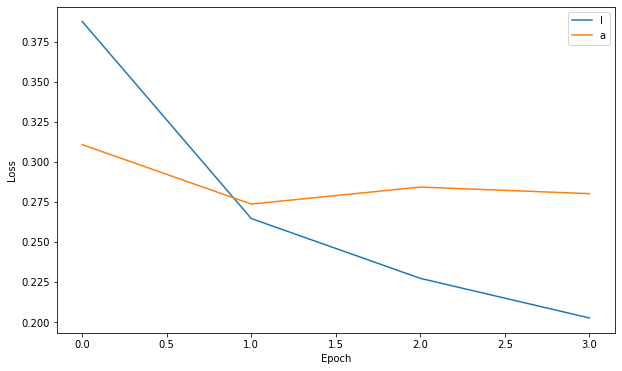

In [34]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

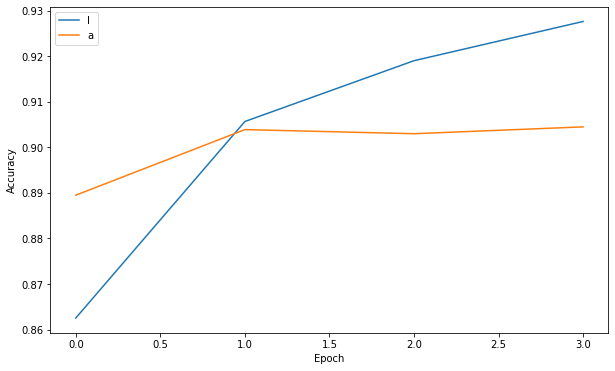

In [35]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

**Train the model using earlystop.**

**Plot values of metrics you used in your model.**

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [37]:
print(model.evaluate(x_test,y_test,verbose=1))

313/313 [==============================] - 2s 5ms/step - loss: 0.2801 - accuracy: 0.9045
[0.28012868762016296, 0.9045000076293945]


In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
preds = model.predict(x_test)
preds

array([[4.31625409e-07, 9.64541919e-11, 7.82354590e-08, ...,
        1.02703467e-04, 3.29815776e-07, 9.99858499e-01],
       [1.27142209e-06, 6.47551860e-15, 9.99960065e-01, ...,
        2.70561424e-15, 1.22268889e-10, 3.20978256e-14],
       [7.51131495e-08, 9.99999881e-01, 1.01068354e-09, ...,
        4.56235256e-13, 8.08629275e-10, 1.07777134e-12],
       ...,
       [3.11286286e-08, 1.31819824e-14, 1.55620299e-07, ...,
        1.09892062e-09, 9.99989748e-01, 2.51283803e-11],
       [1.23819021e-07, 9.99992251e-01, 5.24568033e-09, ...,
        2.00204769e-10, 8.99208596e-10, 3.20546922e-10],
       [1.43727742e-03, 3.37899874e-05, 3.85430339e-03, ...,
        3.92372869e-02, 1.69772916e-02, 1.66563094e-02]], dtype=float32)

In [40]:
preds[0]

array([4.3162541e-07, 9.6454192e-11, 7.8235459e-08, 2.7337210e-09,
       3.9351846e-07, 3.6151916e-05, 1.3105455e-06, 1.0270347e-04,
       3.2981578e-07, 9.9985850e-01], dtype=float32)

In [41]:
predictions= np.argmax(preds, axis=1)

In [42]:
len(predictions)

10000

In [46]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [51]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.28012868762016296
Test accuracy: 0.9045000076293945


In [53]:
print(confusion_matrix(y_test, predictions))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

# Prediction

In [54]:
my_pred = x_test[5]

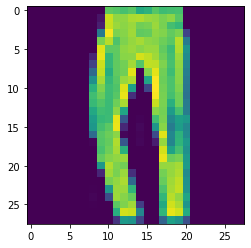

In [57]:
plt.imshow(my_pred.reshape(28,28));

In [55]:
model.predict(my_pred.reshape(1,28,28,1))

array([[6.6593100e-07, 9.9999857e-01, 2.9050936e-08, 3.1552199e-07,
        1.1360177e-07, 1.4466044e-08, 1.8364874e-07, 9.2788138e-12,
        7.0445452e-08, 1.1569811e-10]], dtype=float32)

In [58]:
np.argmax(model.predict(my_pred.reshape(1,28,28,1)), axis=1)

array([1], dtype=int64)

# End of Assignment

In [ ]:
model.save("cnn-assingment_2.h5")